In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

In [2]:
# I'm using the recent release of sklearn
#pip install scikit-learn --upgrade

In [3]:
#to plot decision tree
#!pip install graphviz 
import graphviz

In [4]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
%matplotlib inline

In [6]:
data=pd.read_json('../data/cars.json')

In [40]:
data.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year,year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01,1970
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01,1970
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01,1970
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01,1970
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01,1970


In [7]:
data.dtypes

Acceleration        float64
Cylinders             int64
Displacement        float64
Horsepower          float64
Miles_per_Gallon    float64
Name                 object
Origin               object
Weight_in_lbs         int64
Year                 object
dtype: object

In [8]:
data['year']=pd.to_datetime(data.Year).dt.year
data=data.dropna()

# We are interested in what makes a car fuel efficient

In [9]:
data.describe()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs,year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,15.541327,5.471939,194.411990,104.469388,23.445918,2977.584184,1976.051020
std,2.758864,1.705783,104.644004,38.491160,7.805007,849.402560,3.788858
min,8.000000,3.000000,68.000000,46.000000,9.000000,1613.000000,1970.000000
25%,13.775000,4.000000,105.000000,75.000000,17.000000,2225.250000,1973.000000
50%,15.500000,4.000000,151.000000,93.500000,22.750000,2803.500000,1976.000000
75%,17.025000,8.000000,275.750000,126.000000,29.000000,3614.750000,1979.000000
max,24.800000,8.000000,455.000000,230.000000,46.600000,5140.000000,1982.000000


In [10]:
data.corr()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs,year
Acceleration,1.000000,-0.504683,-0.543800,-0.689196,0.423329,-0.416839,0.287630
Cylinders,-0.504683,1.000000,0.950823,0.842983,-0.777618,0.897527,-0.345244
Displacement,-0.543800,0.950823,1.000000,0.897257,-0.805127,0.932994,-0.370041
Horsepower,-0.689196,0.842983,0.897257,1.000000,-0.778427,0.864538,-0.416316
Miles_per_Gallon,0.423329,-0.777618,-0.805127,-0.778427,1.000000,-0.832244,0.580755
Weight_in_lbs,-0.416839,0.897527,0.932994,0.864538,-0.832244,1.000000,-0.310499
year,0.287630,-0.345244,-0.370041,-0.416316,0.580755,-0.310499,1.000000


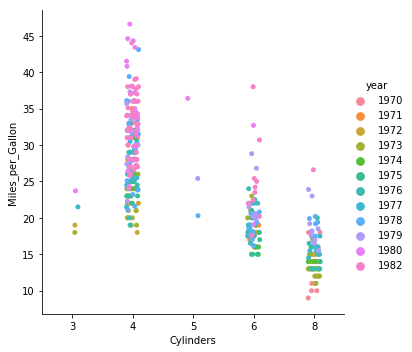

In [11]:
sns.catplot(y='Miles_per_Gallon', x='Cylinders', hue='year', data=data)

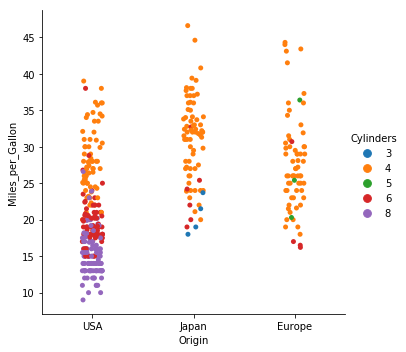

In [12]:
sns.catplot(y='Miles_per_Gallon', x='Origin', hue='Cylinders', data=data)

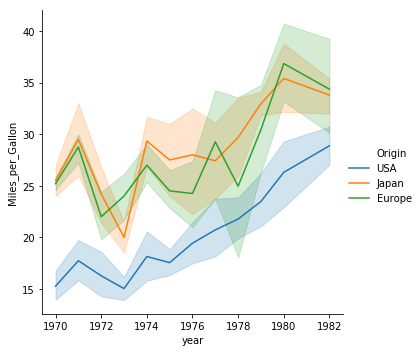

In [13]:
sns.relplot(x='year', y='Miles_per_Gallon', kind='line', hue='Origin', data=data)

# we want to model fuel efficiency based on multiple factors

In [14]:
X = data[['Cylinders']]
y = data['Miles_per_Gallon']

In [15]:
dtree = tree.DecisionTreeRegressor().fit(X, y)

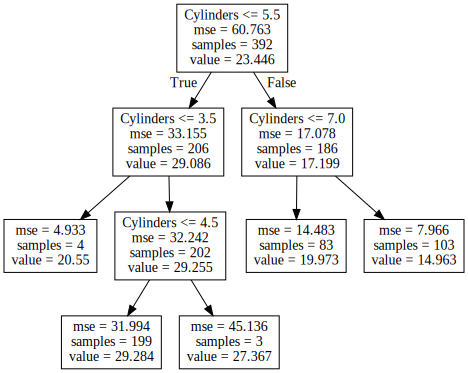

In [16]:
graphviz.Source(tree.export_graphviz(dtree, feature_names=X.columns))

In [17]:
yfit = dtree.predict(X)

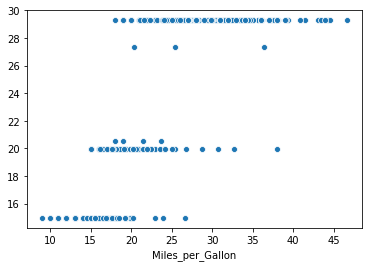

In [18]:
sns.scatterplot(y, yfit)

In [19]:
resid = y-yfit

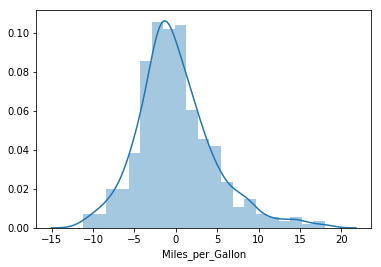

In [20]:
sns.distplot(resid)

In [21]:
r2_score(y, yfit)

0.6412742329799173

## Lets add more features

In [22]:
X2 = data[['Acceleration', 'Cylinders', 'Displacement', 'Horsepower', 'Weight_in_lbs']]
y = data['Miles_per_Gallon']


In [23]:
dtree2 = tree.DecisionTreeRegressor().fit(X2, y)

In [24]:
yfit2 = dtree2.predict(X2)

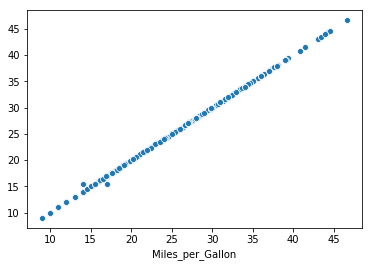

In [25]:
sns.scatterplot(y, yfit2)

In [26]:
resid2 = y-yfit2

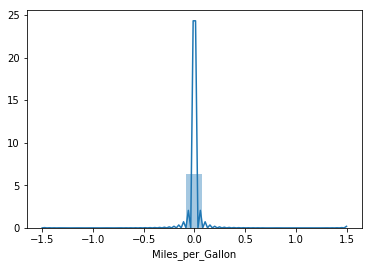

In [27]:
sns.distplot(resid2)

In [28]:
r2_score(y, yfit2)

0.9998110751402748

## Shall we celebrate?

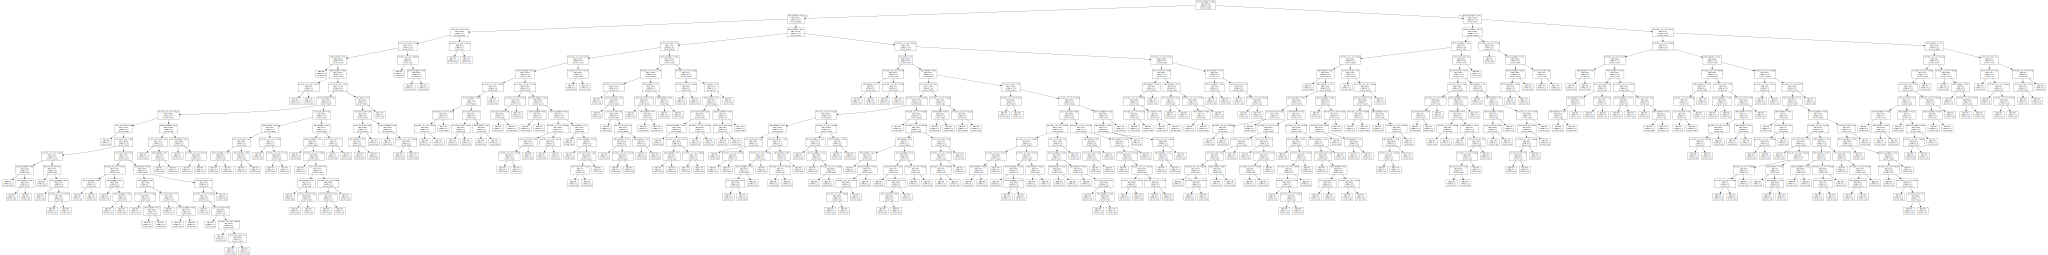

In [29]:
graphviz.Source(tree.export_graphviz(dtree2, feature_names=X2.columns))

# Split data to testing and validation sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,train_size=0.5)
dtree = tree.DecisionTreeRegressor().fit(X_train, y_train)
yfit_test = dtree.predict(X_test)
r2_score(y_test, yfit_test)

0.6269420073612748

In [31]:
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state=0,train_size=0.5)
dtree2 = tree.DecisionTreeRegressor().fit(X2_train, y_train)
yfit2_test = dtree2.predict(X2_test)
r2_score(y_test, yfit2_test)

0.584193517460594

# Feature selection

In [32]:
X2.columns

Index(['Acceleration', 'Cylinders', 'Displacement', 'Horsepower',
       'Weight_in_lbs'],
      dtype='object')

In [33]:
dtree2.feature_importances_  

array([0.04913175, 0.5936713 , 0.06349462, 0.2159995 , 0.07770284])

In [34]:
X3 = data[['Cylinders', 'Horsepower']]
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, random_state=0,train_size=0.5)
dtree3 = tree.DecisionTreeRegressor().fit(X3_train, y_train)
yfit3_test = dtree3.predict(X3_test)
r2_score(y_test, yfit3_test)

0.5941415933448058

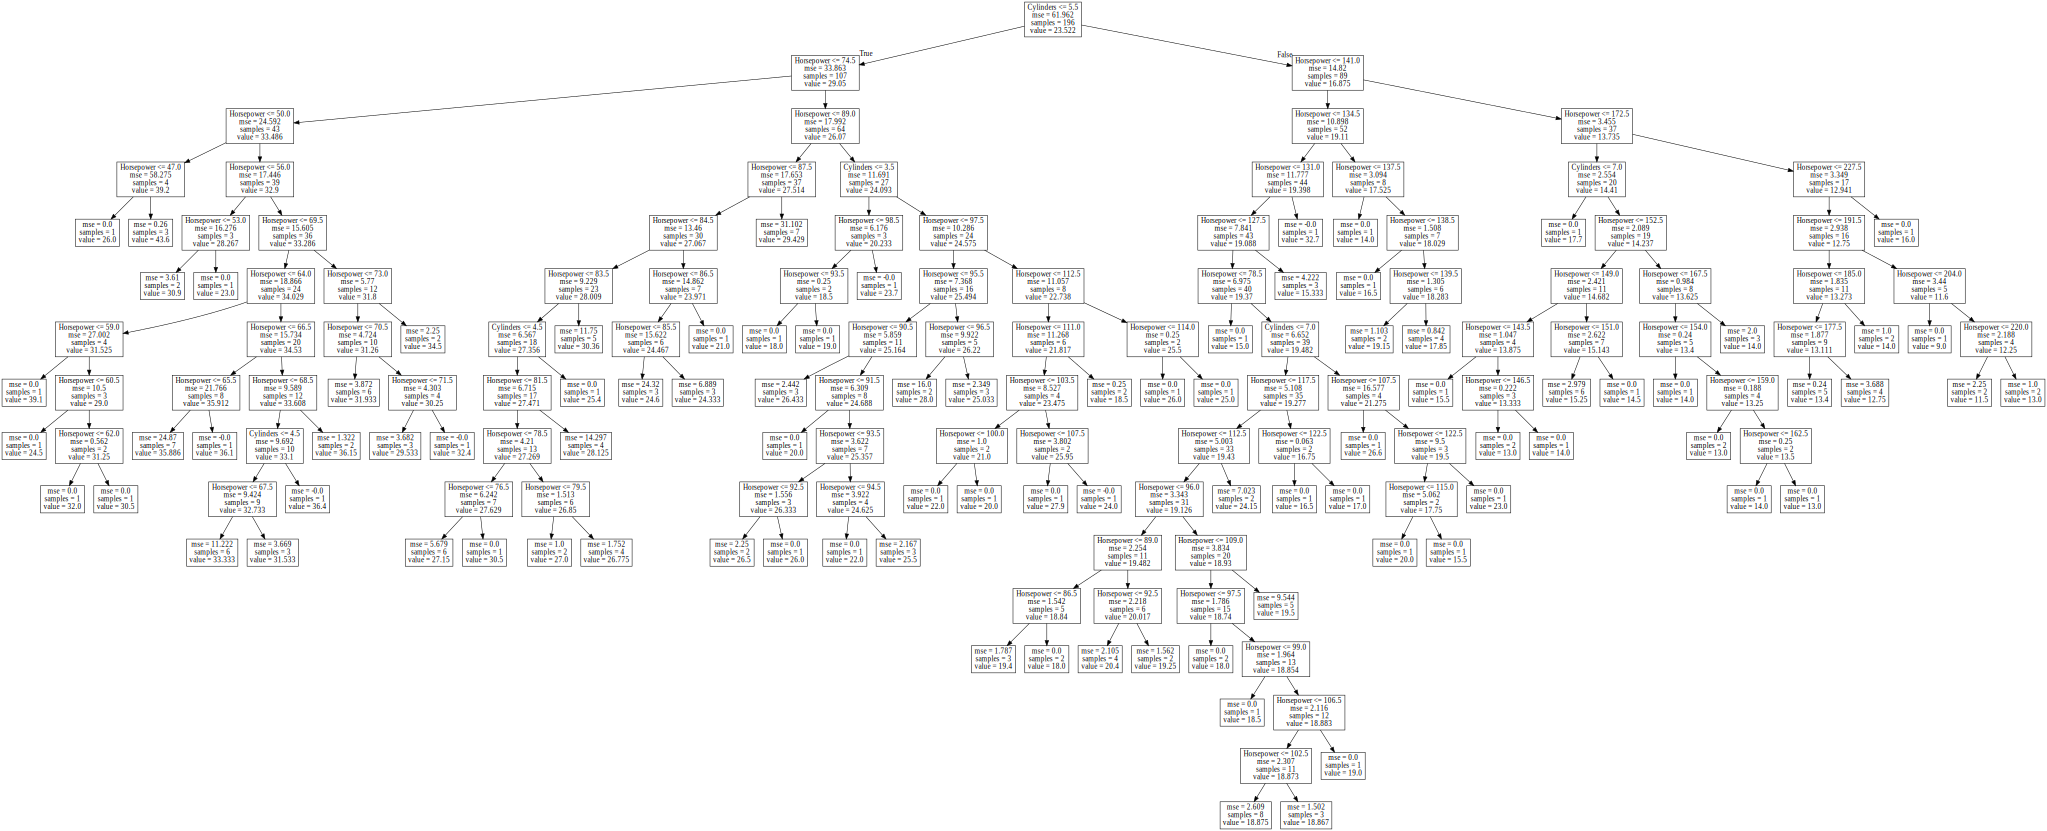

In [35]:
graphviz.Source(tree.export_graphviz(dtree3, feature_names=X3.columns))

In [36]:
X3 = data[['Cylinders', 'Horsepower']]
X3_train, X3_test, y_train, y_test = train_test_split(X3, y, random_state=0,train_size=0.5)
dtree3 = tree.DecisionTreeRegressor(max_leaf_nodes=10).fit(X3_train, y_train)
yfit3_test = dtree3.predict(X3_test)
r2_score(y_test, yfit3_test)

0.6680992264446135

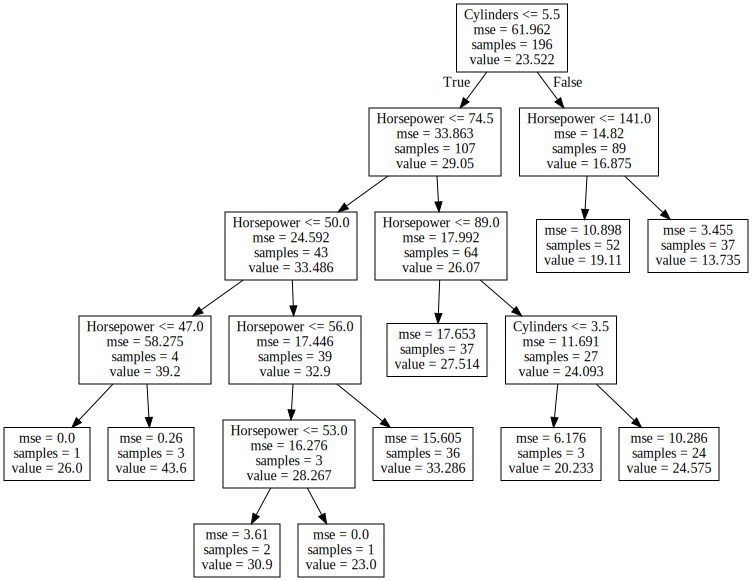

In [37]:
graphviz.Source(tree.export_graphviz(dtree3, feature_names=X3.columns))

# Add country as a feature

In [38]:
X4 = data[['Acceleration', 'Cylinders', 'Displacement', 'Horsepower', 'Weight_in_lbs', 'Origin']]
y = data['Miles_per_Gallon']



In [39]:
dtree4 = tree.DecisionTreeRegressor().fit(X4, y)

ValueError: could not convert string to float: 'USA'

In [41]:
data2=data.drop(['Name', 'Year'], axis='columns')

In [42]:
data3=pd.get_dummies(data2)
data3.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Weight_in_lbs,year,Origin_Europe,Origin_Japan,Origin_USA
0,12.0,8,307.0,130.0,18.0,3504,1970,0,0,1
1,11.5,8,350.0,165.0,15.0,3693,1970,0,0,1
2,11.0,8,318.0,150.0,18.0,3436,1970,0,0,1
3,12.0,8,304.0,150.0,16.0,3433,1970,0,0,1
4,10.5,8,302.0,140.0,17.0,3449,1970,0,0,1


In [43]:
X4 = data3.drop('Miles_per_Gallon', axis='columns')
y = data3['Miles_per_Gallon']

In [44]:
dtree4 = tree.DecisionTreeRegressor(max_leaf_nodes=10).fit(X4, y)

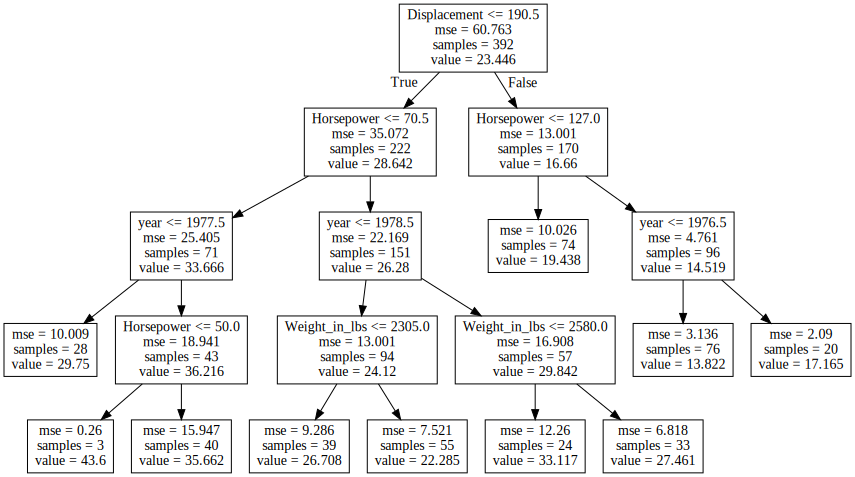

In [45]:
graphviz.Source(tree.export_graphviz(dtree4, feature_names=X4.columns))